In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('diabetes.csv')

#Data Pre-Procession

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#Memeriksa nilai null dalam persentase seperti dalam bentuk nol

In [ ]:
sr=df.isin([0]).mean()*100

In [ ]:
sr

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

#Konvert 0 ke nilai null dan mengecek lagi

In [ ]:
data=df.drop(['Outcome'],axis=1)
nc=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df[nc]=df[nc].replace(0,np.NaN)
sr=df.isnull().mean()*100
sr

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

#dropped the column whose null value percentage is more than 30%??

In [ ]:
sr[sr>30].index

Index(['Insulin'], dtype='object')

In [ ]:
data=df.copy()
data=data.drop(list(sr[sr>30].index),axis=1)

#Mengisi nilai null dengan mean/median

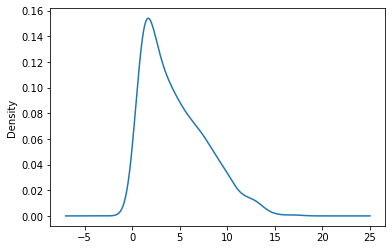

In [ ]:
data.Pregnancies.plot(kind='kde')

In [ ]:
data.Pregnancies=data.Pregnancies.fillna(data.Pregnancies.median())

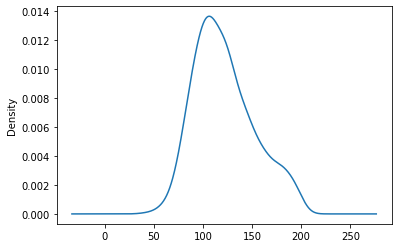

In [ ]:
data.Glucose.plot(kind='kde')

72.40518417462484

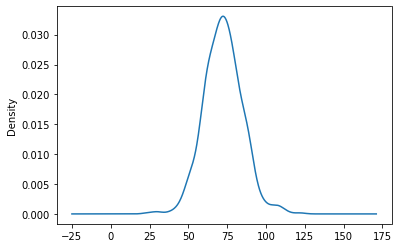

In [ ]:
data.BloodPressure.plot(kind='kde')
data.BloodPressure.mean()

29.153419593345657

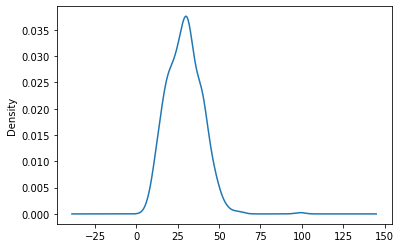

In [ ]:
data.SkinThickness.plot(kind='kde')
data.SkinThickness.mean()

32.457463672391015

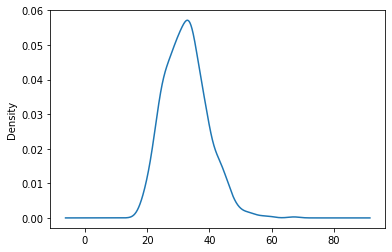

In [ ]:
data.BMI.plot(kind='kde')
data.BMI.mean()

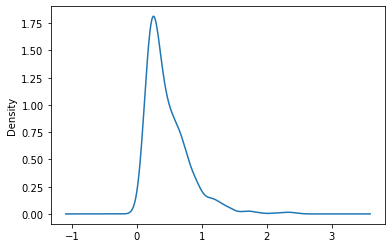

In [ ]:
data.DiabetesPedigreeFunction.plot(kind='kde')

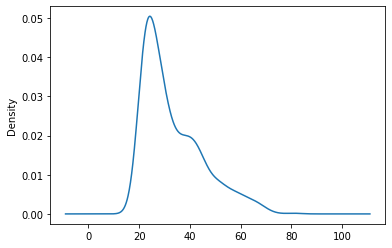

In [ ]:
data.Age.plot(kind='kde')

In [ ]:
data.Glucose=data.Glucose.fillna(data.Glucose.median())
data.BloodPressure=data.BloodPressure.fillna(data.BloodPressure.mean())
data.SkinThickness=data.SkinThickness.fillna(data.SkinThickness.median())
data.BMI=data.BMI.fillna(data.BMI.median())
data.DiabetesPedigreeFunction=data.DiabetesPedigreeFunction.fillna(data.DiabetesPedigreeFunction.median())
data.Age=data.Age.fillna(data.Age.median())

#Mengecek kembali nilai null

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#?? outlier checking and treatment by capping outliers??

In [ ]:
import seaborn as sns
data_outlier_rem=data.copy()

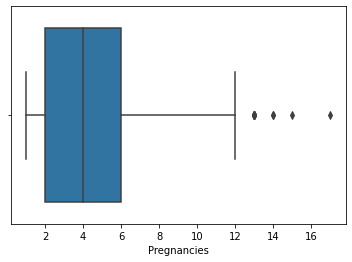

In [ ]:
sns.boxplot(x=data_outlier_rem['Pregnancies'])

In [ ]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['Pregnancies'].values<8]

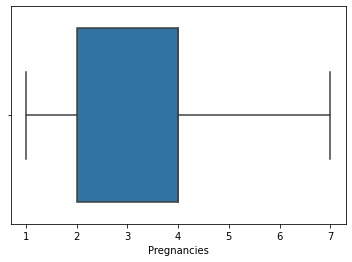

In [ ]:
sns.boxplot(x=data_outlier_rem['Pregnancies'])

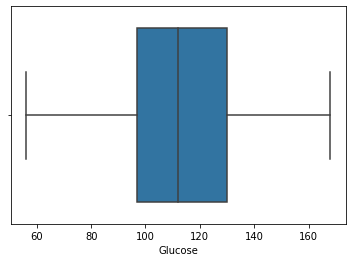

In [ ]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['Glucose'].values<169]
data_outlier_rem=data_outlier_rem[data_outlier_rem['Glucose'].values>50]
sns.boxplot(x=data_outlier_rem['Glucose'])
#kalo error pisah 1 1

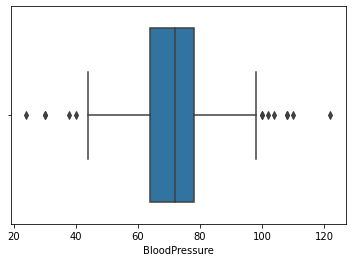

In [ ]:
sns.boxplot(x=data_outlier_rem['BloodPressure'])

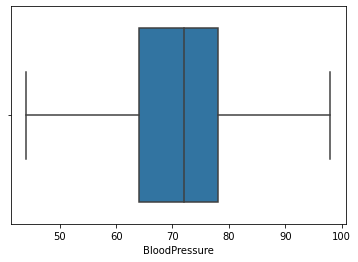

In [ ]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['BloodPressure'].values>40]
data_outlier_rem=data_outlier_rem[data_outlier_rem['BloodPressure'].values<100]
sns.boxplot(x=data_outlier_rem['BloodPressure'])

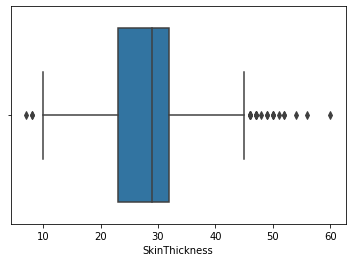

In [ ]:
sns.boxplot(x=data_outlier_rem['SkinThickness'])

In [ ]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['SkinThickness'].values<44]

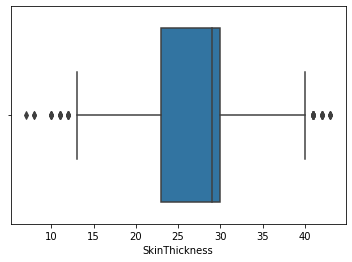

In [ ]:
sns.boxplot(x=data_outlier_rem['SkinThickness'])

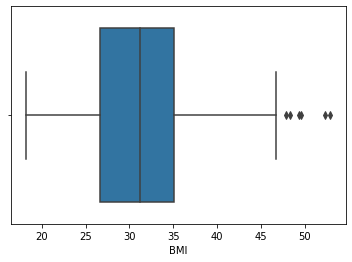

In [ ]:
sns.boxplot(x=data_outlier_rem['BMI'])

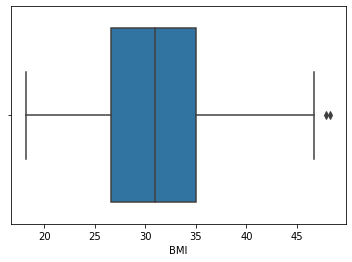

In [ ]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['BMI'].values<49]
sns.boxplot(x=data_outlier_rem['BMI'])

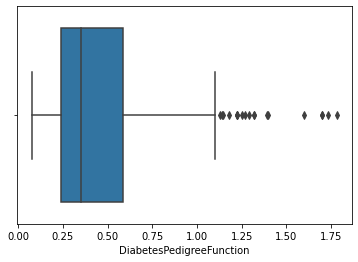

In [ ]:
sns.boxplot(x=data_outlier_rem['DiabetesPedigreeFunction'])

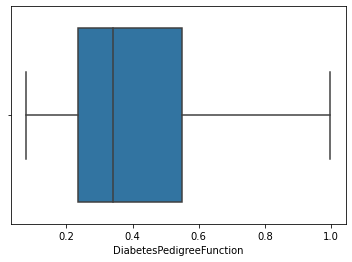

In [ ]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['DiabetesPedigreeFunction'].values<1]
sns.boxplot(x=data_outlier_rem['DiabetesPedigreeFunction'])

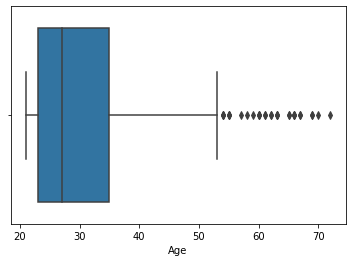

In [ ]:
sns.boxplot(x=data_outlier_rem['Age'])

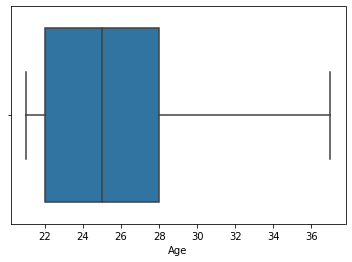

In [ ]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['Age'].values<37.5]
sns.boxplot(x=data_outlier_rem['Age'])

In [ ]:
data_outlier_rem

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1.0,85.0,66.0,29.0,26.6,0.351,31,0
3,1.0,89.0,66.0,23.0,28.1,0.167,21,0
5,5.0,116.0,74.0,29.0,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,31.0,0.248,26,1
10,4.0,110.0,92.0,29.0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...
758,1.0,106.0,76.0,29.0,37.5,0.197,26,0
760,2.0,88.0,58.0,26.0,28.4,0.766,22,0
764,2.0,122.0,70.0,27.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,26.2,0.245,30,0


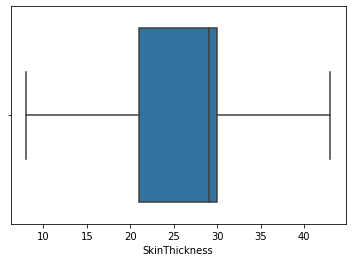

In [ ]:
sns.boxplot(x=data_outlier_rem['SkinThickness'])

#Mengecek data output seimbang atau tidak

0    334
1     77
Name: Outcome, dtype: int64

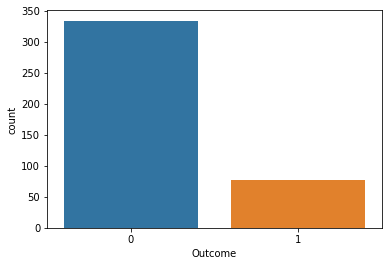

In [ ]:
death=data_outlier_rem.copy()
sns.countplot(x=death['Outcome'])
death['Outcome'].value_counts()

#Jika data tidak balanced maka akan di balanced dengan resampling

In [ ]:
from sklearn.utils import resample
dm=death[(death['Outcome']==0)]
dmin=death[(death)['Outcome']==1]
upsample=resample(dmin,replace=True,n_samples=334,random_state=42)
dd=pd.concat([upsample, dm])

1    334
0    334
Name: Outcome, dtype: int64

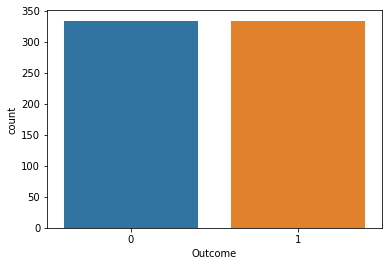

In [ ]:
sns.countplot(x=dd['Outcome'])
dd['Outcome'].value_counts()

#Check korelasi

In [ ]:
dd.corr()["Outcome"].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.458909
BMI                         0.358704
Age                         0.351587
SkinThickness               0.280357
Pregnancies                 0.250638
DiabetesPedigreeFunction    0.231490
BloodPressure               0.092890
Name: Outcome, dtype: float64

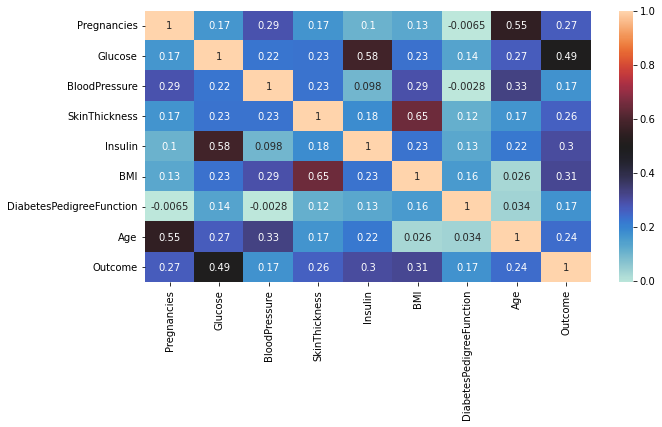

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
corr=df.corr()
sns.heatmap(corr,cmap="icefire", annot=True)

In [ ]:
dd

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
400,4.0,95.0,64.0,29.0,32.0,0.161,31,1
179,5.0,130.0,82.0,29.0,39.1,0.956,37,1
646,1.0,167.0,74.0,17.0,23.4,0.447,33,1
480,3.0,158.0,70.0,30.0,35.5,0.344,35,1
213,4.0,140.0,65.0,26.0,42.6,0.431,24,1
...,...,...,...,...,...,...,...,...
758,1.0,106.0,76.0,29.0,37.5,0.197,26,0
760,2.0,88.0,58.0,26.0,28.4,0.766,22,0
764,2.0,122.0,70.0,27.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,26.2,0.245,30,0


#Logical Regression

In [ ]:
x=dd.drop('Outcome' ,axis=1)
y=dd['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
clf=LabelEncoder()

dd['Outcome']=clf.fit_transform(dd['Outcome'])

x_train, x_test, y_train, y_test= train_test_split(x, y, stratify=y, test_size=0.2)

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000)
log.fit(x_train, y_train)

print("The Training accuracy of model = {:.2f}".format(log.score(x_train, y_train)))
print("The Testing accuracy of model = {:.2f}".format(log.score(x_test, y_test)))

The Training accuracy of model = 0.78
The Testing accuracy of model = 0.72


In [ ]:
from sklearn.metrics import confusion_matrix
p=log.predict(x_test)
m=confusion_matrix(y_test,p)
m

array([[46, 21],
       [16, 51]])

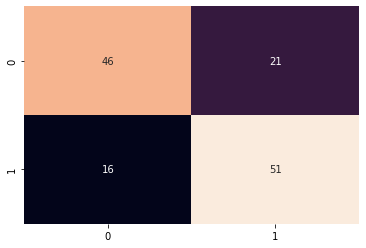

In [ ]:
sns.heatmap(m, cbar= False, fmt='g', annot= True)

#Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2, random_state=0)

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
print("Accuracy With Decision Tree : {}".format(accuracy_score(y_pred,Y_test)))

Accuracy With Decision Tree : 0.9253731343283582


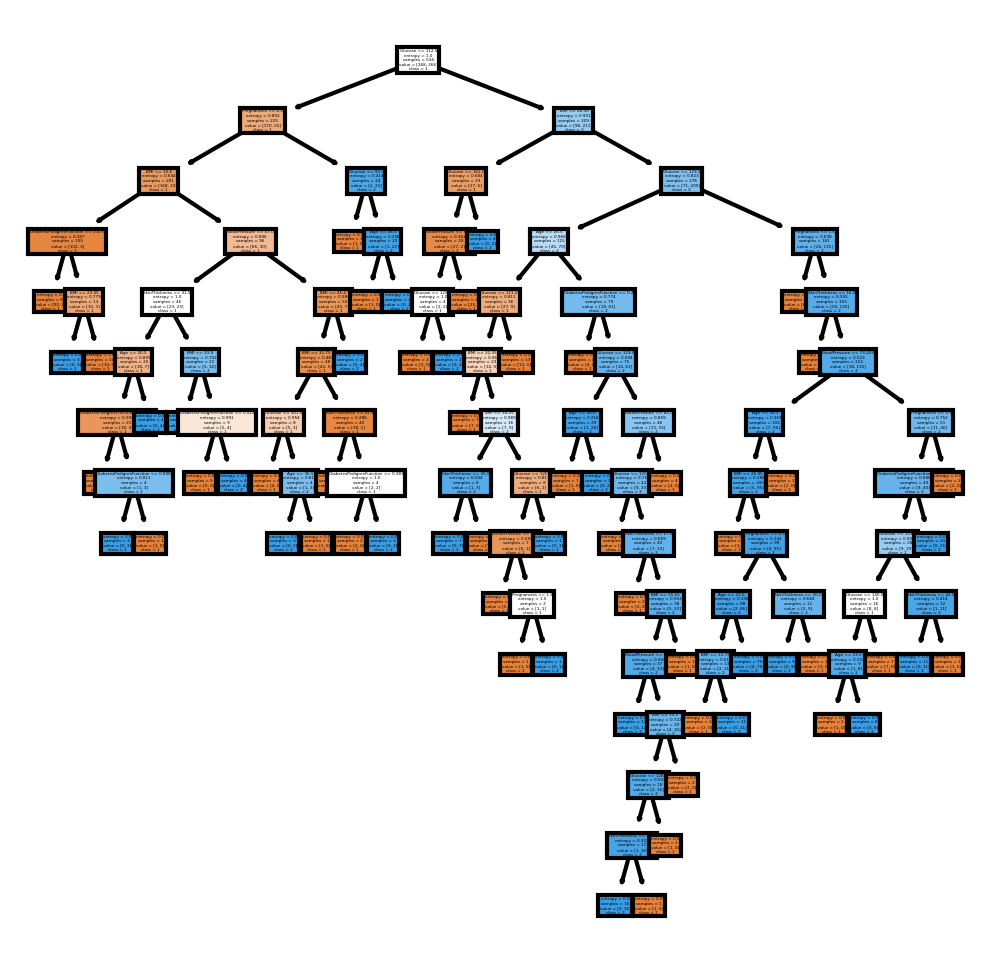

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names =x.columns,
               class_names= ['1','2','3','4','5','6','7'],
               filled = True);

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ranf=RandomForestClassifier()
ranf.fit(X_train,Y_train)
prf=ranf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm=confusion_matrix(Y_test,prf)
cm

array([[60,  6],
       [ 0, 68]])

Accuracy With Decision Tree:  0.96


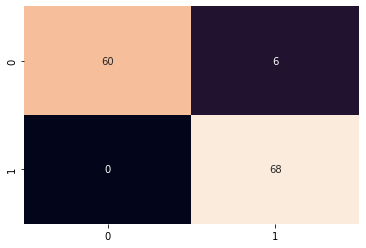

In [ ]:
sns.heatmap(cm, cbar= False, fmt= 'g', annot= True)

print("Accuracy With Decision Tree: ",round(accuracy_score(prf,Y_test),2))

In [ ]:
print("clasification report : \n\n ",classification_report(prf,Y_test))

clasification report : 

                precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       1.00      0.92      0.96        74

    accuracy                           0.96       134
   macro avg       0.95      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134



In [ ]:
#simpan file dengan pickle

import pickle
with open('random_forest','wb') as r:
  pickle.dump(ranf,r)

In [ ]:
datas = np.array([6,148,72,35,0,33.6,0.627,50])
datas = np.reshape( 1, -1)
ranf.predict(datas)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: ignored